In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Epileptic Seizure Recognition.csv')
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
df.drop(columns=['Unnamed'], inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
class_labels = df['y'].unique()
print("Unique class labels:", class_labels)

Unique class labels: [4 1 5 2 3]


In [ ]:
missing_values=df.isnull().sum()
missing_values

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

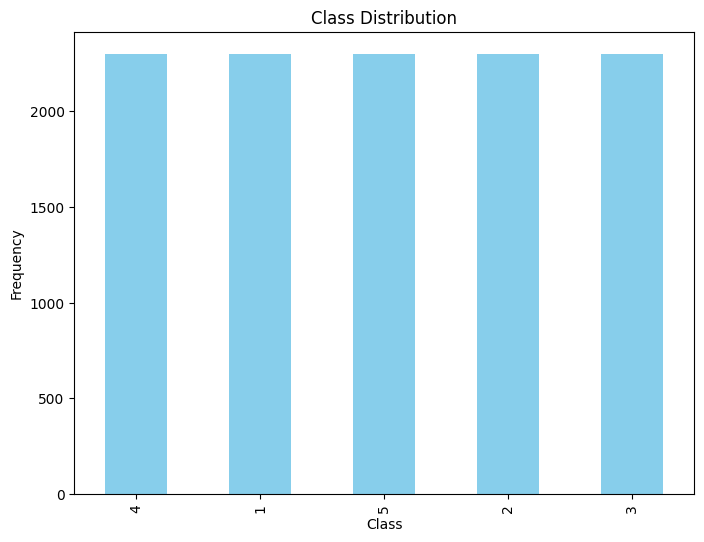

In [ ]:
class_counts = df['y'].value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['y'])
y = df['y']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_encoded, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9200, 178)
(2300, 178)
(9200,)
(2300,)


In [ ]:
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
input_shape = X_train_reshaped.shape[1:]
num_classes = len(np.unique(y))

In [ ]:

from tensorflow.keras import layers, Model
def LSTM(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.LSTM(64, return_sequences=True)(inputs)  # First LSTM layer
    x = layers.LSTM(64, return_sequences=True)(x)  # Second LSTM
    x = layers.LSTM(64, return_sequences=True)(x)  # Third LSTM layer
    x = layers.LSTM(64, return_sequences=True)(x)  # Fourth LSTM layer
    x = layers.LSTM(64)(x)  # Fifth LSTM layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

lstm_model = LSTM(input_shape, num_classes)
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()
lstm_history = lstm_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_reshaped, y_test)
print("LSTM Model Accuracy:", lstm_accuracy)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 178)]          0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)             62208     
                                                                 
 lstm_6 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_7 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_8 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 5)                 325 

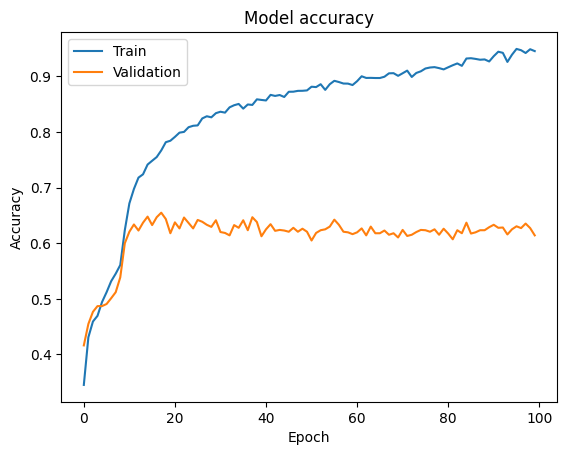

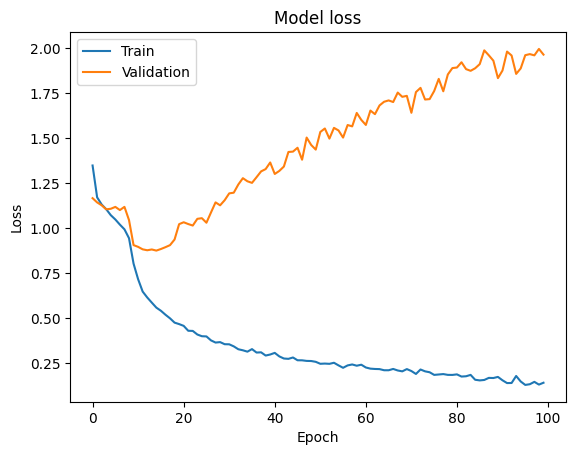

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from tensorflow.keras.layers import Bidirectional

def BiLSTM(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = Bidirectional(layers.LSTM(64, return_sequences=True))(inputs)  # Bidirectional LSTM layer
    x = layers.LSTM(64, return_sequences=True)(x)  # Second LSTM layer
    x = layers.LSTM(64, return_sequences=True)(x)  # Third LSTM layer
    x = layers.LSTM(64, return_sequences=True)(x)  # Fourth LSTM layer
    x = layers.LSTM(64)(x)  # Fifth LSTM layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

bilstm_model = BiLSTM(input_shape, num_classes)
bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
bilstm_model.summary()
bilstm_history = bilstm_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2)
bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_test_reshaped, y_test)
print("BiLSTM Model Accuracy:", bilstm_accuracy)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 178)]          0         
                                                                 
 bidirectional (Bidirection  (None, 1, 128)            124416    
 al)                                                             
                                                                 
 lstm_11 (LSTM)              (None, 1, 64)             49408     
                                                                 
 lstm_12 (LSTM)              (None, 1, 64)             33024     
                                                                 
 lstm_13 (LSTM)              (None, 1, 64)             33024     
                                                                 
 lstm_14 (LSTM)              (None, 64)                33024     
                                                           

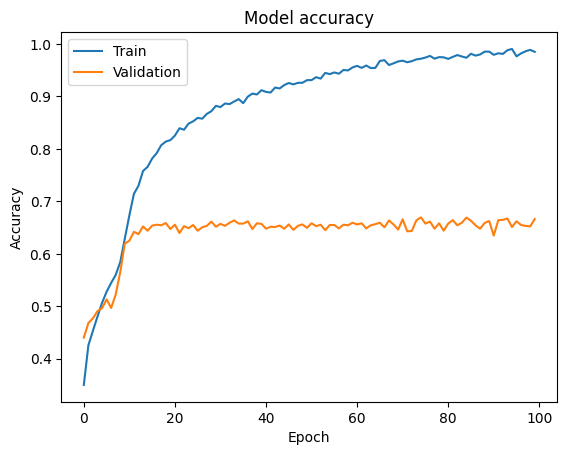

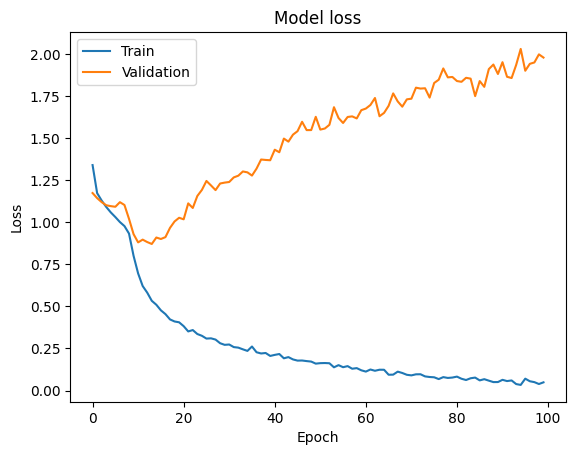

In [ ]:
plt.plot(bilstm_history.history['accuracy'])
plt.plot(bilstm_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(bilstm_history.history['loss'])
plt.plot(bilstm_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
def GRUModel(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.GRU(64, return_sequences=True)(inputs)  # First GRU layer
    x = layers.GRU(32, return_sequences=True)(x)  # Second GRU layer
    x = layers.GRU(64)(x)  # Third GRU layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model


gru_model = GRUModel(input_shape, num_classes)
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
gru_model.summary()

gru_history = gru_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2)
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped, y_test)
print("GRU Model Accuracy:", gru_accuracy)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 178)]          0         
                                                                 
 gru (GRU)                   (None, 1, 64)             46848     
                                                                 
 gru_1 (GRU)                 (None, 1, 32)             9408      
                                                                 
 gru_2 (GRU)                 (None, 64)                18816     
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 75397 (294.52 KB)
Trainable params: 75397 (294.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
230/230 [

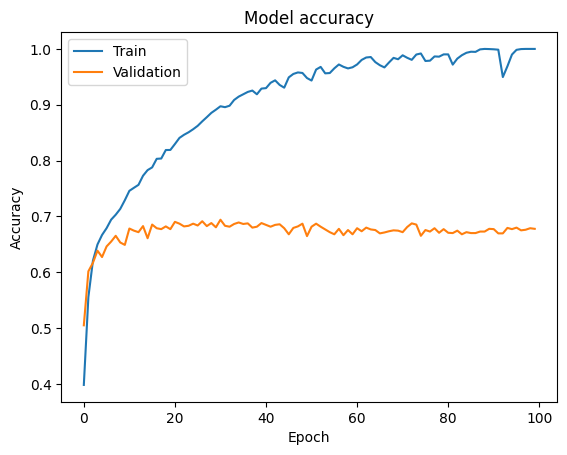

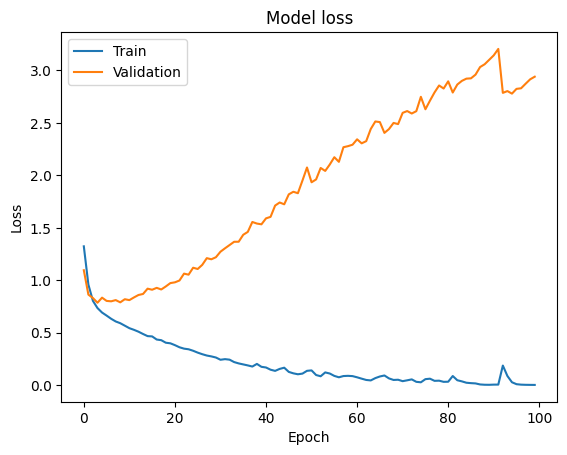

In [ ]:

plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
def BiGRUModel(input_shape, num_classes, use_dropout=False, dropout_rate=0.2, use_l1_l2=False, l1=1e-5, l2=1e-5):
    inputs = layers.Input(shape=input_shape)
    x = layers.Bidirectional(layers.GRU(64, return_sequences=True), merge_mode='concat')(inputs)
    if use_dropout:
        x = layers.Dropout(dropout_rate)(x)
    if use_l1_l2:
        kernel_regularizer = regularizers.l1_l2(l1=l1, l2=l2)
    else:
        kernel_regularizer = None
    x = layers.GRU(64, return_sequences=False, kernel_regularizer=kernel_regularizer)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

bigru_model = BiGRUModel(input_shape, num_classes)
bigru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
bigru_model.summary()
bigru_history = bigru_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2)
bigru_loss, bigru_accuracy = bigru_model.evaluate(X_test_reshaped, y_test)
print("BiGRU Model Accuracy:", bigru_accuracy)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 178)]          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 1, 128)            93696     
 onal)                                                           
                                                                 
 gru_4 (GRU)                 (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 5)                 325       
                                                                 
Total params: 131269 (512.77 KB)
Trainable params: 131269 (512.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
230/230 [==============================] - 7s 12ms/step - loss: 1.2918 - 

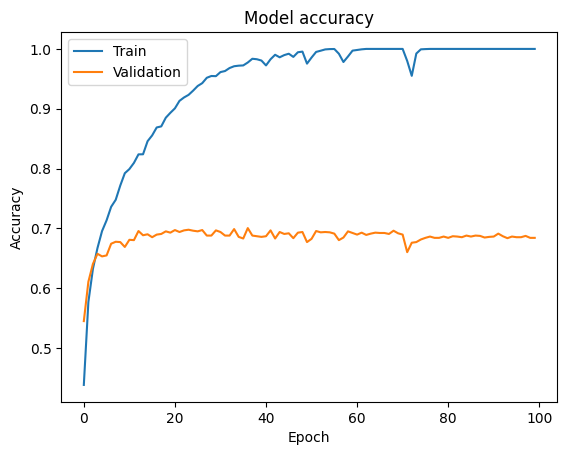

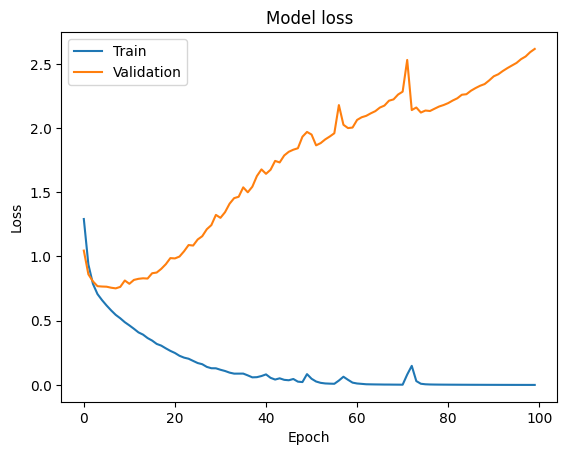

In [ ]:

plt.plot(bigru_history.history['accuracy'])
plt.plot(bigru_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(bigru_history.history['loss'])
plt.plot(bigru_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from tensorflow.keras.layers import Input, GRU, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np


def create_rnn_model(input_shape, num_classes, use_dropout=False, dropout_rate=0.2, use_l1_l2=False, l1=1e-5, l2=1e-5):
    inputs = Input(shape=input_shape)
    x = Bidirectional(GRU(64, return_sequences=True), merge_mode='concat')(inputs)
    if use_dropout:
        x = Dropout(dropout_rate)(x)
    if use_l1_l2:
        kernel_regularizer = tf.keras.regularizers.l1_l2(l1=l1, l2=l2)
    else:
        kernel_regularizer = None
    x = GRU(64, return_sequences=False, kernel_regularizer=kernel_regularizer)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model
rnn_model = create_rnn_model(input_shape, num_classes)
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()


rnn_history = rnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2)
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_reshaped, y_test)
print("RNN Model Accuracy:", rnn_accuracy)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 178)]          0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 1, 128)            93696     
 onal)                                                           
                                                                 
 gru_6 (GRU)                 (None, 64)                37248     
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 131269 (512.77 KB)
Trainable params: 131269 (512.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
230/230 [==============================] - 7s 10ms/step - loss: 1.2939 - 

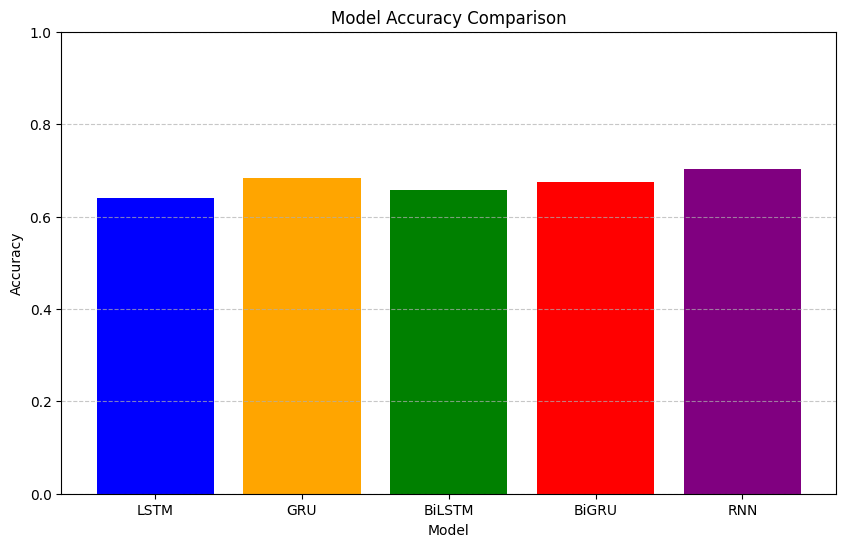

In [ ]:
import matplotlib.pyplot as plt

model_names = ['LSTM', 'GRU', 'BiLSTM', 'BiGRU', 'RNN']
accuracies = [lstm_accuracy, gru_accuracy, bilstm_accuracy, bigru_accuracy, rnn_accuracy]
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
